# Sintonização de Controlador PI via Alocação de Polos

Neste notebook, vamos projetar um controlador PI para o sistema

$G(s) = \frac{2}{s}$

utilizando a técnica de alocação de polos. A ideia é que, utilizando um controlador PI

$ C(s) = K_p + \frac{K_i}{s} $,

a função de transferência em malha aberta será:

$ G_{OL}(s)= G(s) C(s)= \frac{2K_p}{s} + \frac{2K_i}{s^2} $.

Ao fechar o laço com feedback unitário, a equação característica se torna:

$ s^2 + 2K_p s + 2K_i = 0 $.

Queremos que essa equação seja equivalente à equação característica desejada para um sistema de segunda ordem:

$ s^2+2\zeta \omega_n s+\omega_n^2=0 $.

Portanto, comparando os coeficientes, temos:

- $ 2K_p = 2\zeta \omega_n $ $ \Rightarrow K_p = \zeta \omega_n $
- $ 2K_i = \omega_n^2 $ $ \Rightarrow K_i = \frac{\omega_n^2}{2} $

Como exemplo, vamos adotar:

- $ \zeta = 0.7 $
- $ \omega_n = 5 \, \text{rad/s} $

Com isso:

- $ K_p = 0.7 \times 5 = 3.5 $
- $ K_i = \frac{5^2}{2} = 12.5 $


In [1]:
# Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl

# Definindo a planta: G(s) = 2/s
num_G = [2]
den_G = [1, 0]
G = ctrl.TransferFunction(num_G, den_G)

# Parâmetros de projeto desejados
zeta = 0.7
omega_n = 5.0

# Cálculo dos ganhos do controlador PI
Kp = zeta * omega_n
Ki = (omega_n**2) / 2
print(f"Kp = {Kp:.2f}, Ki = {Ki:.2f}")

# Definindo o controlador PI: C(s) = Kp + Ki/s
# Podemos escrever C(s) = (Kp*s + Ki)/s
num_C = [Kp, Ki]
den_C = [1, 0]
C = ctrl.TransferFunction(num_C, den_C)

# Função de transferência em malha aberta
OL = ctrl.series(C, G)
print("\nFunção de transferência em malha aberta:")
print(OL)

# Função de transferência em malha fechada com feedback unitário
CL = ctrl.feedback(OL, 1)
print("\nFunção de transferência em malha fechada:")
print(CL)

/home/tiago/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Kp = 3.50, Ki = 12.50

Função de transferência em malha aberta:
<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


7 s + 25
--------
  s^2


Função de transferência em malha fechada:
<TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


   7 s + 25
--------------
s^2 + 7 s + 25



## Análise do Sistema em Malha Fechada

Agora vamos visualizar a resposta ao degrau e o mapa de polos e zeros do sistema em malha fechada.

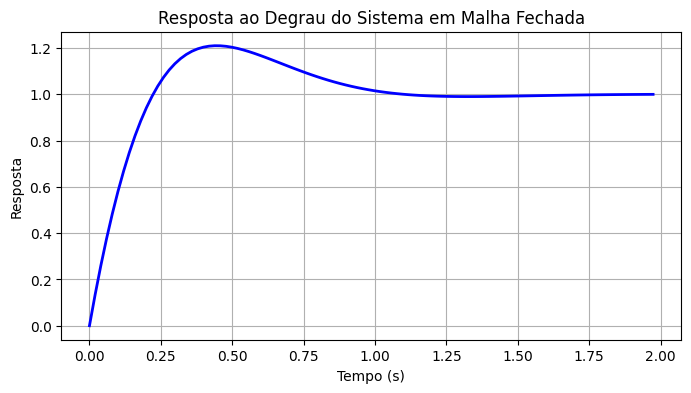

In [2]:
# Plotando a resposta ao degrau do sistema em malha fechada
t, y = ctrl.step_response(CL)

plt.figure(figsize=(8, 4))
plt.plot(t, y, 'b-', linewidth=2)
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.title('Resposta ao Degrau do Sistema em Malha Fechada')
plt.grid(True)
plt.show()

/home/tiago/.local/lib/python3.10/site-packages/control/pzmap.py:318: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


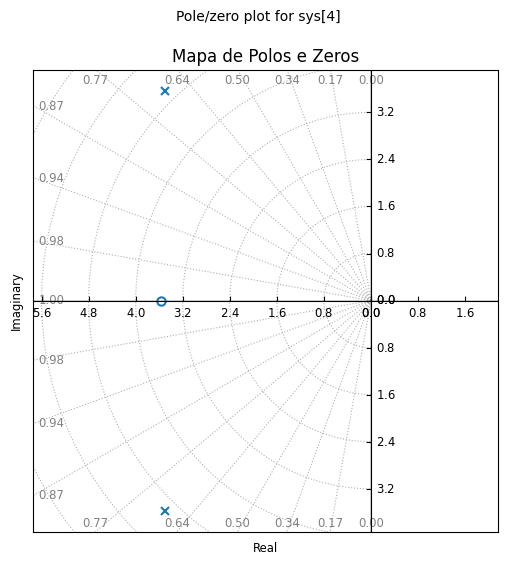

In [5]:
# Plotando o mapa de polos e zeros
plt.figure(figsize=(6, 6))
ctrl.pzmap(CL, plot=True, grid=True)
plt.title('Mapa de Polos e Zeros')
plt.show()

## Conclusão

Observamos que os polos em malha fechada do sistema estão localizados de acordo com as especificações desejadas ($\zeta = 0.7$ e $\omega_n = 5\, \text{rad/s}$).

Este notebook demonstra como utilizar a biblioteca `control` para realizar o projeto e a análise de um controlador PI por alocação de polos.